In [1]:
import numpy as np
import tensorflow as tf
path = "output/wave/single/test/run_20210715-091023/trial_0/model"
model = tf.keras.models.load_model(path)

In [59]:
from matplotlib import pyplot as plt

n1d = 20
npts = n1d*n1d
lb=0; ub=1
x_lin = np.linspace(lb, ub, n1d)
y_lin = np.linspace(lb, ub, n1d)
t_lin = np.linspace(0, 2, 2*n1d)
t_g, x_g, y_g = np.meshgrid(t_lin, x_lin, y_lin, indexing="ij")
def flatten_end(arr):
    return arr.reshape(arr.shape[0], -1)

x = flatten_end(x_g)
y = flatten_end(y_g)
t = flatten_end(t_g)

# plt.scatter(x, y, s=0.2)

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(x,y,t, s=0.5)

X = np.stack([x,y,t], axis=-1)
p_mat_arr = np.zeros((len(t_lin), len(x_lin), len(y_lin)))
for i, t0 in enumerate(t):
    Y_pred = model.predict(X[i])
    Y_pred = Y_pred.reshape(len(x_lin), len(y_lin))
    p_mat_arr[i] = Y_pred
    

Animation frame: 0. Now 0% done with animation.
Animation frame: 0. Now 0% done with animation.
Animation frame: 3. Now 8% done with animation.
Animation frame: 6. Now 15% done with animation.
Animation frame: 9. Now 22% done with animation.
Animation frame: 12. Now 30% done with animation.
Animation frame: 15. Now 38% done with animation.
Animation frame: 18. Now 45% done with animation.
Animation frame: 21. Now 52% done with animation.
Animation frame: 24. Now 60% done with animation.
Animation frame: 27. Now 68% done with animation.
Animation frame: 30. Now 75% done with animation.
Animation frame: 33. Now 82% done with animation.
Animation frame: 36. Now 90% done with animation.
Animation frame: 39. Now 98% done with animation.


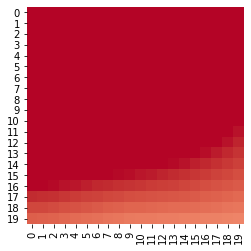

In [60]:
from plots import make_heatmap_animation
make_heatmap_animation(p_mat_arr, ".")

In [ ]:
import seaborn as sns
from matplotlib import animation

def make_heatmap_animation(mat_list, save_dir, R=None, fps = 10):
    '''
    '''
    assert len(mat_list.shape) == 3, "Needs to be an array, not a list. An array of shape (T,N,M)"
    avg = np.mean(mat_list)
    std = np.std(mat_list)
    color_spread = 1.5
    if R is None:
        # Deduce R from matrix
        R = np.max([np.abs(avg + color_spread * std), np.abs(avg - color_spread * std)])

    fig = plt.figure()
    cmap = sns.color_palette("coolwarm", as_cmap=True)

    def animate(i):
        if i % 3 == 0:
            print(f"Animation frame: {i}. Now {i / len(mat_list) * 100 :.0f}% done with animation.")
        sns.heatmap(mat_list[i],  vmin = -R, vmax= R, square=True, cbar=False, center=0.00, cmap=cmap)
        # plt.clf()
        # plt.close()

    anim = animation.FuncAnimation(fig, animate, frames=len(mat_list), repeat = False)

    savefile = save_dir + "/heatmap.gif"
    pillowwriter = animation.PillowWriter(fps=fps)
    anim.save(savefile, writer=pillowwriter)

print("Making p_mat_list (for heatmap animation)...")
print("Making heatmap animation...")
def make_heatmap_animation_clean(mat_arr, mat_arr_dt, figs_folder, anim_dt = None, secs_per_sec = None):
    anim_di = int(anim_dt / mat_arr_dt)
    every_n_frames = anim_di
    fps = secs_per_sec / anim_dt
    make_heatmap_animation(mat_arr, save_dir=figs_folder, fps=fps)


make_heatmap_animation_clean(p_mat_arr)

print("Finished making heatmap animation")

make_heatmap_animation(p_mat_arr, ".")